#Esercizio 1
Using all the Python modules you need compute the following distances:

a. Compute the $L_p$ distance between $(1, 2)$ and $(3, 4)$ for $p = 1, 2, ∞$.

b. Given two objects represented by the tuples $(22, 1, 42, 10)$ and $(20, 0, 36, 8)$:

1. Compute the Euclidean distance between the two objects.
2. Compute the Manhattan distance between the two objects.
3. Compute the Minkowski distance between the two objects, using $h = 3$.
4. Compute the supremum distance ($L_∞$) between the two objects.


In [ ]:
from scipy.spatial.distance import minkowski
from scipy.spatial.distance import chebyshev
import math

x=(1,2)
y=(3,4)

print(minkowski(x, y, 1))
print(minkowski(x, y, 2))

# L-1000 approssima L-inf
print(minkowski(x, y, 1000))
print(minkowski(x, y, math.inf))
print(chebyshev(x, y))

4.0
2.8284271247461903
2.0013867749251615
2.0
2


In [ ]:
x=(22,1,42,10)
y=(20,0,36,8)
print(f'Euclidean: {minkowski(x, y, 2)}')
print(f'City block: {minkowski(x, y, 1)}')
print(f'L-3: {minkowski(x, y, 3)}')
print(f'L-inf: {chebyshev(x, y)}')

Euclidean: 6.708203932499369
City block: 11.0
L-3: 6.153449493663682
L-inf: 6


#Esercizio 2
Download the Ionosphere data set from the UCI Machine Learning Repository, remove the class feature and compute the $L_p$ distance between all pairs of data points, for $p=1,2,∞$.

Compute the contrast measure on the data set for the different norms.

Repeat the exercise after sampling the first $r$ dimensions, where $r$ varies from 1 to the full dimensionality of the data.

In [ ]:
import pandas as pd

labels=list(range(1, 35)) + ['class']
df = pd.read_csv('http://www.lacascia.it/bd2/_ionosphere/ionosphere.data', names=labels)
data = df.iloc[:, :-1].to_numpy(copy=True)
print(data.shape)

(351, 34)


In [ ]:
import numpy as np

# Calcolo le distanze di ogni punto con tutti gli altri
# matrice delle distanze
distances = np.zeros((3, data.shape[0],data.shape[0]))
for i in range(data.shape[0]):
    for j in range(data.shape[0]):
        distances[0][i][j] = minkowski(data[i, :], data[j, :], 1)
        distances[1][i][j] = minkowski(data[i, :], data[j, :], 2)
        distances[2][i][j] = chebyshev(data[i, :], data[j, :])
print(distances.shape)

(3, 351, 351)


In [ ]:
# Contrasto calcolato su tutte le 351*351 distanze
for p in range(3):
  print(f'Contrasto {p} = {(distances[p].max()-distances[p].min())/distances[p].mean()}')

Contrasto 0 = 2.637098523831358
Contrasto 1 = 2.448631091359712
Contrasto 2 = 1.4544022218157644


In [ ]:
# Calcolo le distanze di tutti i punti dall'origine per determinare il
# contrasto come indicato nel libro
dist_orig = np.zeros((3, data.shape[0]))
z = np.zeros((data.shape[1]))
for i in range(data.shape[0]):
    dist_orig[0][i] = minkowski(data[i, :], z, 1)
    dist_orig[1][i] = minkowski(data[i, :], z, 2)
    dist_orig[2][i] = chebyshev(data[i, :], z)

In [ ]:
# Contrasto calcolato sulle 351 distanze dall'origine
for p in range(3):
  print(f'Contrasto {p} = {(dist_orig[p].max()-dist_orig[p].min())/dist_orig[p].mean()}')

Contrasto 0 = 1.923890880204829
Contrasto 1 = 1.3501351458749584
Contrasto 2 = 0.0


In [ ]:
# Andamento del contrasto per r che va da 10 a 34
# contrasto calcolato dalle distanze dall'origine dei campioni
for r in range(10,data.shape[1]):
  distr=np.zeros((3, data.shape[0]))
  zr=np.zeros(r)
  for i in range(data.shape[0]):
    distr[0][i] = minkowski(data[i, :r], zr, 1)
    distr[1][i] = minkowski(data[i, :r], zr, 2)
    distr[2][i] = chebyshev(data[i, :r], zr)
  c1=(distr[0].max()-distr[0].min())/distr[0].mean()
  c2=(distr[1].max()-distr[1].min())/distr[1].mean()
  cinf=(distr[2].max()-distr[2].min())/distr[2].mean()

  print(f'dim: {r} - {c1}, {c2}, {cinf}')
#  print(f'{distr[0].max()}, {distr[0].min()}, {distr[0].mean()}')
#  print(f'{distr[1].max()}, {distr[1].min()}, {distr[1].mean()}')
#  print(f'{distr[2].max()}, {distr[2].min()}, {distr[2].mean()}')
#  print()

dim: 10 - 1.8238459281470523, 1.5054094073725903, 1.0173913043478262
dim: 11 - 1.790833275488398, 1.4940780122904522, 1.0173913043478262
dim: 12 - 1.8494203485048468, 1.5265487572053007, 1.0173913043478262
dim: 13 - 1.8192199420713207, 1.5124171387440775, 1.0115273775216138
dim: 14 - 1.8709363026717518, 1.5411961456126817, 1.0115273775216138
dim: 15 - 1.8442248150581972, 1.5300485679939928, 1.0115273775216138
dim: 16 - 1.8974877435266044, 1.5594539736262187, 1.0115273775216138
dim: 17 - 1.8721319728232042, 1.5500319630061876, 1.0115273775216138
dim: 18 - 1.9098686784282954, 1.571581532256193, 1.0115273775216138
dim: 19 - 1.8869298305002706, 1.5632713411572994, 1.0115273775216138
dim: 20 - 1.9181250466588446, 1.5805697106200893, 1.0115273775216138
dim: 21 - 1.9045097529415418, 1.576583041339325, 1.0115273775216138
dim: 22 - 1.9319821757856404, 1.5927006350293185, 1.0115273775216138
dim: 23 - 1.916796082050936, 1.5874354018414154, 1.0115273775216138
dim: 24 - 1.9385098946498753, 1.600638

Nota: se calcoliamo il contrasto a partire dalle distanze di tutti i campioni con tutti gli altri campioni l'andamento decrescente dovrebbe essere più evidente

In [ ]:
# Andamento del contrasto per r che va da 10 a 34
# contrasto calcolato dalle distanze reciproche dei campioni
contrasts=np.zeros((3, data.shape[1]))

# Per semplicità incremento r di 5 in 5
for r in range(5, data.shape[1], 5):
  i = 0
  distances = np.zeros((3, data.shape[0]*data.shape[0]))
  for d1 in data:
    for d2 in data:
        distances[0][i] = minkowski(d1[:r], d2[:r], 1)
        distances[1][i] = minkowski(d1[:r], d2[:r], 2)
        distances[2][i] = chebyshev(d1[:r], d2[:r])
        i += 1
  for p in range(3):
    contrasts[p, r] = (distances[p].max() - distances[p].min()) / distances[p].mean()

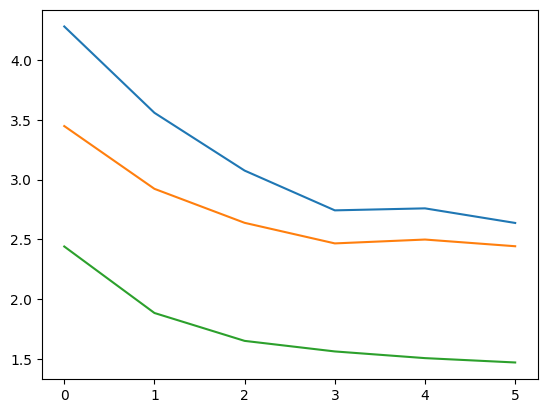

In [ ]:
# Plot del contrasto al crescere di r
import matplotlib.pyplot as plt
plt.plot(contrasts[0, 5::5])
plt.plot(contrasts[1, 5::5])
plt.plot(contrasts[2, 5::5])

#Esercizio 3
Caricate il musk dataset, eliminate le prime colonne non numeriche e riducete la dimensionalità con PCA tenendo il 99% della varianza.

1. Effettuate la classificazione con k-NN utilizzando la distanza di Mahalanobis e confrontate l'accuracy con quella ottenuta con la distanza di default (Euclidea).

2. Provate a implementare la match-based similarity ed effettuare di nuovo la classificazione k-NN.

(Suggerimento: vedete dalla documentazione come si può utilizzare il KNeighborsClassifier di sklearn con metriche diverse dalla Euclidea o implementate voi l'algoritmo k-NN)

In [2]:
import pandas as pd
from sklearn.decomposition import PCA

labels=['molecule', 'conformation']+list(range(166)) +['class']
df = pd.read_csv('http://www.lacascia.it/bd2/clean2.data', names=labels)

# elimino le prime due colonne e l'ultima
data = df.iloc[:, 2:-1].to_numpy(copy=True)
target = df.iloc[:, -1].to_numpy(copy=True)
print(target.shape, data.shape)

# trasformo il dataset mantenendo il 90% della varianza
pca = PCA(n_components=0.90)
data_n = pca.fit(data).transform(data)
print(data_n.shape)

(6598,) (6598, 166)
(6598, 22)


In [3]:
import numpy as np
from numpy.linalg import inv
# calcolo l'inversa della matrice di covarianza dei dati necessaria per la distanza di Mahalanobis
C=np.cov(data_n.T)
CI = inv(C)
CI.shape

(22, 22)

In [22]:
# Faccio lo split fra train e test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_n, target, random_state=11)

print(X_train.shape)
print(X_test.shape)

(4948, 22)
(1650, 22)


In [ ]:
# Calcolo la matrice delle distanze per il train
from scipy.spatial.distance import mahalanobis
dist_train = np.zeros((X_train.shape[0], X_train.shape[0]))
for i in range(X_train.shape[0]):
  for j in range(X_train.shape[0]):
#    dist_train[i, j] = minkowski(X_train[i, :], X_train[j, :], 2)
    dist_train[i, j] = mahalanobis(X_train[i, :], X_train[j, :], CI)
print(f'dist_train: {dist_train.shape}')

# Calcolo la matrice delle distanze del test dal train
dist_test = np.zeros((X_test.shape[0], X_train.shape[0]))
for i in range(X_test.shape[0]):
  for j in range(X_train.shape[0]):
#    dist_test[i, j] = minkowski(X_test[i, :], X_train[j, :], 2)
    dist_test[i, j] = mahalanobis(X_test[i, :], X_train[j, :], CI)
print(f'dist_test: {dist_test.shape}')

# Costruisco il modello e ne valuto le performance
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='precomputed')
knn.fit(X=dist_train, y=y_train)

print(f'Accuracy: {knn.score(dist_test, y_test):.2%}')

(4948, 22)
(1650, 22)
dist_train: (4948, 4948)
dist_test: (1650, 4948)
Accuracy: 97.03%


In [5]:
# KNN con distanza Euclidea
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train, y_train)

print(f'Accuracy: {knn2.score(X_test, y_test):.2%}')

Accuracy: 96.42%


Classificazione k-NN con match-based similarity. Bisogna implementare la match-based similarity (vedi par 3.2.1.5 libro di testo) e poi calcolare le matrici delle distanze ed effettuare la classificazione k-NN come visto in precedenza.

Utilizziamo $k_d$ pari a 5 e $p$ pari a 2 (distanza Euclidea)

In [6]:
# Implementazione di Gabriele Lombardo
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer


def match_distance(a, b, kbd: KBinsDiscretizer, p: int):
    """
    Computes the match-based distance between vectors `a` and `b`.
    First, the vectors are equi-depth discretized using the K-Bins-Discretizer `kbd`. This transformer
    should have already been fit by the caller on the entire dataset, using the 'ordinal' encoding.
    Then, a similarity value is computed summing on the sole dimensions that were discretized in the
    same bin for both vectors, applying for the i-th of these dimensions the formula:
    (1 - (a_i - b_i)/(m_i - n_i))^p, where [n_i, m_i] is the i-th bin.
    Finally, the p-th root of this similarity is computed, and is then converted into a distance.
    :param a: the first vector
    :param b: the second vector
    :param kbd: a sklearn.preprocessing.KBinsDiscretizer already fit on the entire dataset
    :param p: the integer to be used in the formula above
    :return: the match-based distance between vectors `a` and `b`
    """
    a, b = a.reshape(1, -1), b.reshape(1, -1)
    x = kbd.transform(a)
    y = kbd.transform(b)

    dims = np.argwhere(x == y)[:, -1]  # proximity set of i-th and j-th sample
    sim = 0
    for dim in dims:
        bucket = int(x[0, dim])
        dim_buckets = kbd.bin_edges_[dim]
        d_min = dim_buckets[bucket]
        d_max = dim_buckets[bucket + 1]
        sim += (1 - (abs(a[0, dim] - b[0, dim])) / (d_max - d_min)) ** p

    sim = pow(sim, 1 / p)
#    dist = 1 / (1 + sim)
    dist = 1 - sim/5 # k_d=5, se sono uguali sim=5 e dist=0, se completamente diversi sim=0 e dist=1
    return dist

In [7]:
# Creo il discretizzatore sulla base dei dati di train
kbd = KBinsDiscretizer(n_bins=5, encode='ordinal')
kbd.fit(X_train)

KBinsDiscretizer(encode='ordinal')

In [23]:
# Test distanza fra due campioni
d1 = X_train[25, :]
d2 = X_train[30, :]

print(d1)
print(kbd.transform(d1.reshape(1,-1))) # trnsform() si aspetta in input una matrice 2D
print(d2)
print(kbd.transform(d2.reshape(1,-1)))

print(match_distance(d1, d2, kbd, 2))

[-510.25149229 -320.24625291 -244.29917038 -482.56510157 -134.85528317
  259.89978505  103.45692259  -64.99895203  161.04240407  -30.96359628
  -81.66148427   79.0561745   103.63649244  154.99139214   66.35748809
  -39.7462457   -25.2583952    34.69805594  -57.85151458  -84.12296671
   52.06053873    9.32723169]
[[1. 1. 1. 0. 1. 4. 3. 1. 4. 2. 1. 3. 4. 4. 3. 1. 2. 3. 1. 0. 3. 2.]]
[ 668.92647225 -119.68814971  276.94768985  172.83431735 -118.04608438
   16.72932164   19.0338211    16.50520991 -342.65357962  188.29777274
  101.7049482   -97.00933241   66.80142653   43.448925     11.48704489
  -45.61814813   12.83477075  -16.19074506  -25.24719432  -93.77618022
   66.68985868  -63.12474008]
[[3. 3. 3. 4. 1. 2. 2. 2. 0. 4. 3. 1. 3. 3. 2. 1. 2. 2. 1. 0. 3. 1.]]
0.644672272592827


In [24]:
# Prendo solo parte del dataset per motivi di tempo di calcolo
X_train = X_train[:1500]
y_train = y_train[:1500]
X_test = X_test[:500]
y_test = y_test[:500]

# Calcolo la matrice delle distanze per il train
dist_train = np.zeros((X_train.shape[0], X_train.shape[0]))
for i in range(X_train.shape[0]):
  for j in range(X_train.shape[0]):
    dist_train[i, j] = match_distance(X_train[i, :], X_train[j, :], kbd, 2)
print(f'dist_train: {dist_train.shape}')

dist_train: (1500, 1500)


In [25]:
# Calcolo la matrice delle distanze del test dal train
dist_test = np.zeros((X_test.shape[0], X_train.shape[0]))
for i in range(X_test.shape[0]):
  for j in range(X_train.shape[0]):
    dist_test[i, j] = match_distance(X_test[i, :], X_train[j, :], kbd, 2)
print(f'dist_test: {dist_test.shape}')

dist_test: (500, 1500)


In [26]:
# Costruisco il modello e ne valuto le performance
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='precomputed')
knn.fit(X=dist_train, y=y_train)

print(f'Accuracy: {knn.score(dist_test, y_test):.2%}')

Accuracy: 91.80%


#Esercizio 4
Implementate la shared nearest-neighbor similarity (scegliete voi il numero di vicini da considerare)
ed effettuate nuovamente la classificazione k-NN.
Se l'accuratezza del classificatore migliora cosa potete ipotizzare sulla distribuzione dei vostri dati.

In [ ]:
# Uso sklearn.neighbors per trovare i k vicini di due punti, vedo quanti
# sono in comune e ritorno la distanza definita come 1-similarity_normalizzata)
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(X_train)

def shared_nearest(x1, x2):
  res=neigh.kneighbors([x1, x2], return_distance=False)
  count=0
  for v in res[0]:
    if v in res[1]:
      count += 1
  return 1-count/10

print(shared_nearest(X_test[50], X_test[10]))
print(shared_nearest(X_test[50], X_test[50]))

1.0
0.0


In [ ]:
# Calcolo la matrice delle distanze per il train
# Prendo solo parte del dataset per motivi di tempo di calcolo
X_train = X_train[:495]
y_train = y_train[:495]
X_test = X_test[:165]
y_test = y_test[:165]
dist_train = np.zeros((X_train.shape[0], X_train.shape[0]))
for i in range(X_train.shape[0]):
  for j in range(X_train.shape[0]):
    dist_train[i, j] = shared_nearest(X_train[i, :], X_train[j, :])
print(f'dist_train: {dist_train.shape}')

# Calcolo la matrice delle distanze del test dal train
dist_test = np.zeros((X_test.shape[0], X_train.shape[0]))
for i in range(X_test.shape[0]):
  for j in range(X_train.shape[0]):
    dist_test[i, j] = shared_nearest(X_test[i, :], X_train[j, :])
print(f'dist_test: {dist_test.shape}')

# Costruisco il modello e ne valuto le performance
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='precomputed')
knn.fit(X=dist_train, y=y_train)

print(f'Accuracy: {knn.score(dist_test, y_test):.2%}')

dist_train: (495, 495)
dist_test: (165, 495)
Accuracy: 95.15%
